In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [44]:
#Read CSV files
df_customer = pd.read_csv(r'/content/drive/MyDrive/PBI Kalbe Data Science/Case Study/customer.csv', delimiter=';')
df_product = pd.read_csv(r'/content/drive/MyDrive/PBI Kalbe Data Science/Case Study/product.csv', delimiter=';')
df_store = pd.read_csv(r'/content/drive/MyDrive/PBI Kalbe Data Science/Case Study/store.csv', delimiter=';')
df_transaction = pd.read_csv(r'/content/drive/MyDrive/PBI Kalbe Data Science/Case Study/transaction.csv', delimiter=';')

In [45]:
def check_and_clean_data(df):
    # Initial counts of duplicates and missing data
    initial_duplicates = df.duplicated().sum()
    initial_missing = df.isnull().sum().sum()

    # Print initial counts
    print("Initial Count of Duplicates:", initial_duplicates)
    print("Initial Count of Missing Data:", initial_missing)

    # Dropping duplicates and missing values
    df_cleaned = df.drop_duplicates()
    df_cleaned = df_cleaned.dropna()

    # Final counts of duplicates and missing data
    final_duplicates = df_cleaned.duplicated().sum()
    final_missing = df_cleaned.isnull().sum().sum()

    # Print final counts
    print("Final Count of Duplicates:", final_duplicates)
    print("Final Count of Missing Data:", final_missing)

    return df_cleaned

In [46]:
#Data cleaning for customer csv file
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [47]:
# Data cleansing for df_customer by replacing ',' with '.' for the 'Income' column
df_customer['Income'] = df_customer['Income'].replace('[,]', '.', regex=True).astype('float')

In [48]:
df_customer = check_and_clean_data(df_customer)

Initial Count of Duplicates: 0
Initial Count of Missing Data: 3
Final Count of Duplicates: 0
Final Count of Missing Data: 0


In [49]:
#Data cleaning for product csv file

In [50]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [51]:
df_product = check_and_clean_data(df_product)

Initial Count of Duplicates: 0
Initial Count of Missing Data: 0
Final Count of Duplicates: 0
Final Count of Missing Data: 0


In [52]:
#Data cleaning for store csv file

In [53]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [54]:
# Data cleansing for df_store by replacing ',' with '.'
df_store['Latitude'] = df_store['Latitude'].replace('[,]', '.', regex=True).astype('float')
df_store['Longitude'] = df_store['Longitude'].replace('[,]', '.', regex=True).astype('float')

In [55]:
df_store = check_and_clean_data(df_store)

Initial Count of Duplicates: 0
Initial Count of Missing Data: 0
Final Count of Duplicates: 0
Final Count of Missing Data: 0


In [56]:
#Data cleaning for transaction csv file

In [57]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [58]:
df_transaction = check_and_clean_data(df_transaction)

Initial Count of Duplicates: 0
Initial Count of Missing Data: 0
Final Count of Duplicates: 0
Final Count of Missing Data: 0


In [59]:
# Data cleansing for df_transaction by changing the Date format to datetime
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

In [60]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


In [61]:
print(df_transaction['TransactionID'].value_counts())

TR71313    3
TR42197    2
TR90402    2
TR74019    2
TR49649    2
          ..
TR29792    1
TR23081    1
TR1691     1
TR98388    1
TR85684    1
Name: TransactionID, Length: 4908, dtype: int64


In [62]:
print(df_transaction[df_transaction['TransactionID'] == 'TR71313'])
print(df_transaction[df_transaction['TransactionID'] == 'TR42197'])

     TransactionID  CustomerID       Date ProductID  Price  Qty  TotalAmount  \
1982       TR71313         117 2022-05-21        P1   8800   10        88000   
3336       TR71313         401 2022-08-30        P3   7500    6        45000   
3722       TR71313         370 2022-09-26        P3   7500    2        15000   

      StoreID  
1982        8  
3336       11  
3722        3  
     TransactionID  CustomerID       Date ProductID  Price  Qty  TotalAmount  \
1574       TR42197         181 2022-04-23        P5   4200    4        16800   
3711       TR42197          24 2022-09-26        P8  16000    2        32000   

      StoreID  
1574       12  
3711       13  


From the result above, shown that some TransactionIDs are used for different CustomersID on different dates. This might indicate a data input error or inconsistency.

In [63]:
# Group by 'TransactionID' and select the row with the maximum 'Date'
df_transaction = df_transaction.sort_values(by='Date', ascending=False) \
    .groupby('TransactionID', as_index=False).first()

In [64]:
print(df_transaction[df_transaction['TransactionID'] == 'TR71313'])
print(df_transaction[df_transaction['TransactionID'] == 'TR42197'])

     TransactionID  CustomerID       Date ProductID  Price  Qty  TotalAmount  \
3309       TR71313         370 2022-09-26        P3   7500    2        15000   

      StoreID  
3309        3  
     TransactionID  CustomerID       Date ProductID  Price  Qty  TotalAmount  \
1762       TR42197          24 2022-09-26        P8  16000    2        32000   

      StoreID  
1762       13  


In [65]:
#merge all data

In [66]:
# Merge the DataFrames
df_merge = pd.merge(df_transaction, df_customer, on='CustomerID', how='inner')
df_merge = pd.merge(df_merge, df_product.drop(columns=('Price')), on='ProductID', how='inner')
df_merge = pd.merge(df_merge, df_store, on='StoreID', how='inner')

In [67]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR10008,235,2022-05-21,P8,16000,2,32000,4,37,0,Married,5.35,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
1,TR39070,350,2022-06-23,P8,16000,2,32000,4,38,0,Single,7.95,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
2,TR8584,293,2022-09-14,P8,16000,3,48000,4,54,0,Married,10.40,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR69229,46,2022-05-07,P8,16000,2,32000,4,36,1,Married,8.31,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR88920,447,2022-01-16,P8,16000,1,16000,4,54,1,Married,20.37,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [68]:
#machine learning: regression

In [83]:
df_regresi = df_merge.groupby(['Date']).agg({
    'Qty' : 'sum'
}).reset_index()

In [70]:
df_regresi

,Date,Qty
0,2022-01-01,47
1,2022-01-02,45
2,2022-01-03,67
3,2022-01-04,98
4,2022-01-05,57
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,40


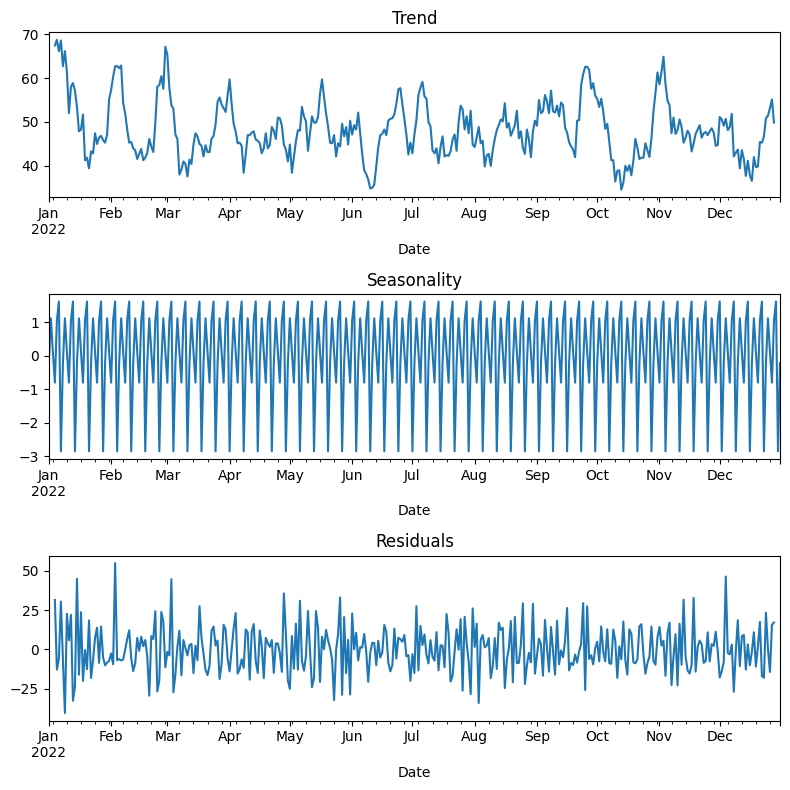

In [71]:
decomposed = seasonal_decompose(df_regresi.set_index('Date'))

plt.figure(figsize=(8, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

### **Check Stationary Data**

In [99]:
cut_off = round(df_regresi.shape[0]*0.8)
df_train = df_regresi[:cut_off]
df_test = df_regresi[cut_off:].reset_index(drop=True)
df_train.shape, df_train.shape

((292, 2), (292, 2))

In [73]:
df_train

,Date,Qty
0,2022-01-01,47
1,2022-01-02,45
2,2022-01-03,67
3,2022-01-04,98
4,2022-01-05,57
...,...,...
287,2022-10-15,33
288,2022-10-16,24
289,2022-10-17,53
290,2022-10-18,47


In [74]:
df_test

,Date,Qty
0,2022-10-20,39
1,2022-10-21,35
2,2022-10-22,56
3,2022-10-23,59
4,2022-10-24,39
...,...,...
68,2022-12-27,70
69,2022-12-28,68
70,2022-12-29,42
71,2022-12-30,40


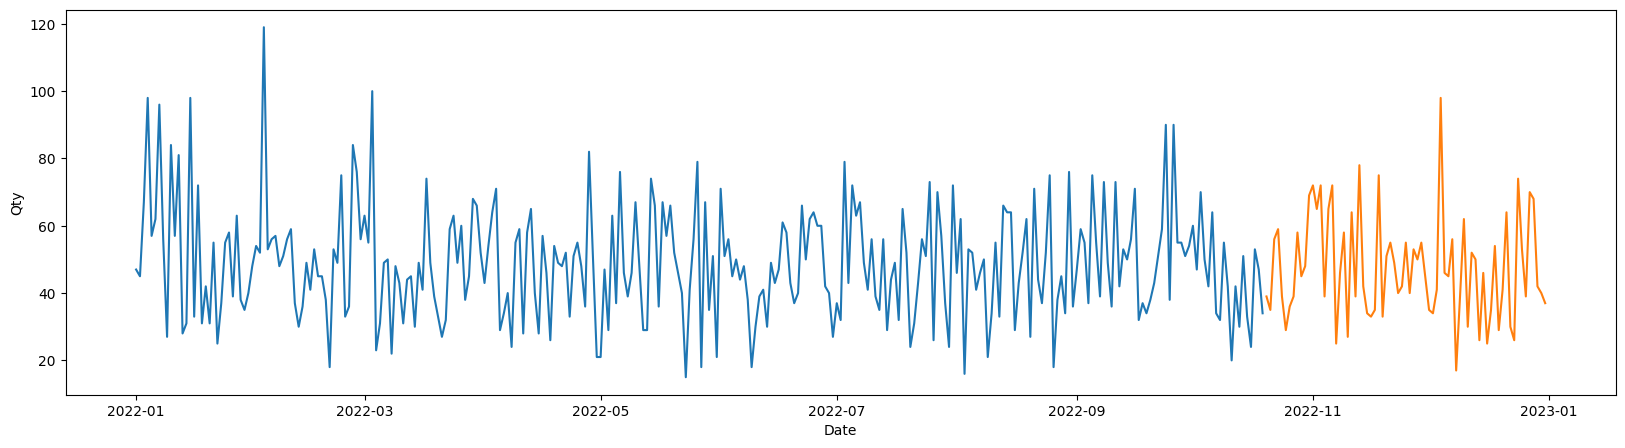

In [75]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_train, x=df_train['Date'], y=df_train['Qty']);
sns.lineplot(data=df_test, x=df_test['Date'], y=df_test['Qty']);

In [76]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_regresi['Qty'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.382389
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


Based on the Dickey-Fuller test,the data is **stationary** since p-value < 0.05

### **Choosing p, d, and q value**

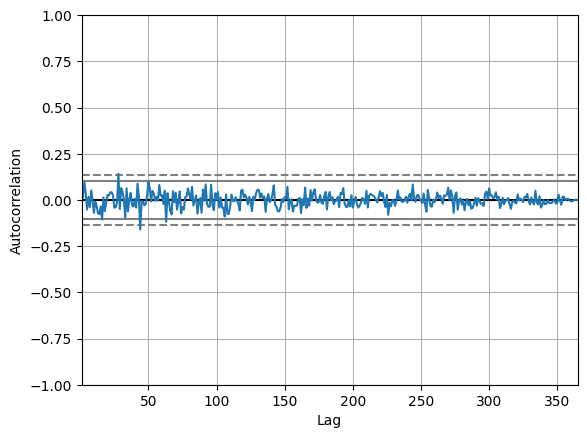

In [85]:
autocorrelation_plot(df_regresi['Qty']);

#### **Choosing p, d, and q values**

In [87]:
import itertools

p=range(0,20)
q=range(0,10)
d=range(0,2)

pdq_combinations=list(itertools.product(p,d,q))
print(len(pdq_combinations))
print(pdq_combinations)

400
[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 0, 6), (0, 0, 7), (0, 0, 8), (0, 0, 9), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (0, 1, 8), (0, 1, 9), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 0, 6), (1, 0, 7), (1, 0, 8), (1, 0, 9), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 1, 6), (1, 1, 7), (1, 1, 8), (1, 1, 9), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (2, 0, 6), (2, 0, 7), (2, 0, 8), (2, 0, 9), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 1, 6), (2, 1, 7), (2, 1, 8), (2, 1, 9), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 0, 5), (3, 0, 6), (3, 0, 7), (3, 0, 8), (3, 0, 9), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 1, 5), (3, 1, 6), (3, 1, 7), (3, 1, 8), (3, 1, 9), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 0, 4), (4, 0, 5), (4, 0, 6), (4, 0, 7), (4, 0, 8), (4, 0, 9), (4, 1

In [88]:
cut_off = round(df_regresi.shape[0]*0.8)
train = df_regresi[:cut_off]
test = df_regresi[cut_off:].reset_index(drop=True)
train.shape, train.shape

((292, 2), (292, 2))

In [89]:
rmse=[]
order1=[]

train = train.set_index('Date')
test = test.set_index('Date')
y = train['Qty']

for pdq in pdq_combinations:
  try:
    model=ARIMA(train, order=pdq).fit()
    pred=model.predict(start=len(train), end=(len(df_regresi)-1))
    error=np.sqrt(mean_squared_error(test,pred))
    order1.append(pdq)
    rmse.append(error)

  except:
    continue

results=pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

In [91]:
results.head()

,RMSE
"(0, 0, 0)",15.498891
"(0, 0, 1)",15.500789
"(0, 0, 2)",15.494289
"(0, 0, 3)",15.506735
"(0, 0, 4)",15.503433


In [90]:
sorted_results = results.sort_values(by='RMSE', ascending=True)
sorted_results

,RMSE
"(9, 1, 6)",14.918501
"(8, 1, 3)",14.974696
"(9, 1, 9)",15.224293
"(13, 1, 9)",15.315993
"(7, 0, 5)",15.383777
...,...
"(12, 1, 0)",17.519169
"(15, 1, 0)",17.526943
"(13, 1, 0)",17.575892
"(1, 1, 0)",17.863020


In [92]:
file_path = '/content/drive/MyDrive/PBI Kalbe Data Science/pdq_values2.csv'
sorted_results.to_csv(file_path, index=False)

### **ARIMA**

RMSE value: 14.918500915278353
MAE value: 12.239665950687728


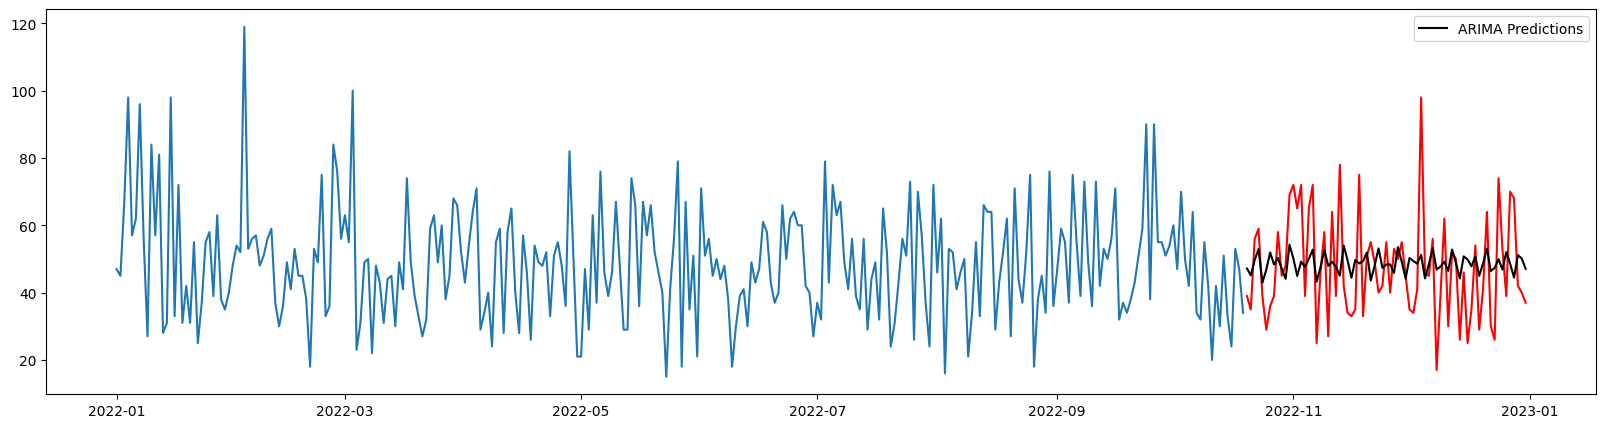

In [100]:
def calculate_rmse(y_actual, y_pred):
    '''
    Function to calculate RMSE
    '''
    return mean_squared_error(y_actual, y_pred) ** 0.5

def evaluate_model(y_actual, y_pred):
    '''
    Function to evaluate machine learning model
    '''
    rmse = calculate_rmse(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    return rmse, mae

# Your existing code
df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')
y = df_train['Qty']

ARIMAmodel = ARIMA(y, order=(9, 1, 6)).fit()

y_pred = ARIMAmodel.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

rmse_value, mae_value = evaluate_model(df_test['Qty'], y_pred_out)

plt.figure(figsize=(20, 5))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_out, color='black', label='ARIMA Predictions')
plt.legend()

print(f'RMSE value: {rmse_value}')
print(f'MAE value: {mae_value}')


In [101]:
y_pred_out

Date
2022-10-20    47.161903
2022-10-21    45.150687
2022-10-22    49.693704
2022-10-23    52.965501
2022-10-24    42.924130
                ...    
2022-12-27    48.585425
2022-12-28    44.465039
2022-12-29    51.147166
2022-12-30    50.132030
2022-12-31    47.088253
Name: predictions, Length: 73, dtype: float64

### **Predict Future Data**

In [110]:
#Build model on full dataset
y_reg = df_regresi.set_index('Date')
y_reg = y_reg['Qty']
final_model = ARIMA(y_reg, order=(9, 1, 6)).fit()
#Forecast for the next 30 days
prediction = final_model.predict(len(y_reg), len(y_reg)+30)

In [115]:
prediction

2023-01-01    53.223276
2023-01-02    45.159975
2023-01-03    40.339958
2023-01-04    53.631394
2023-01-05    51.184289
2023-01-06    45.568267
2023-01-07    49.258518
2023-01-08    44.082652
2023-01-09    50.198317
2023-01-10    55.257635
2023-01-11    43.110750
2023-01-12    45.633968
2023-01-13    51.508462
2023-01-14    47.642232
2023-01-15    52.088596
2023-01-16    46.983743
2023-01-17    42.163114
2023-01-18    53.499560
2023-01-19    51.233562
2023-01-20    45.199442
2023-01-21    49.228864
2023-01-22    45.472297
2023-01-23    49.664634
2023-01-24    54.253377
2023-01-25    43.720884
2023-01-26    45.733559
2023-01-27    51.860171
2023-01-28    47.724855
2023-01-29    50.852956
2023-01-30    47.492977
2023-01-31    43.133530
Freq: D, Name: predicted_mean, dtype: float64

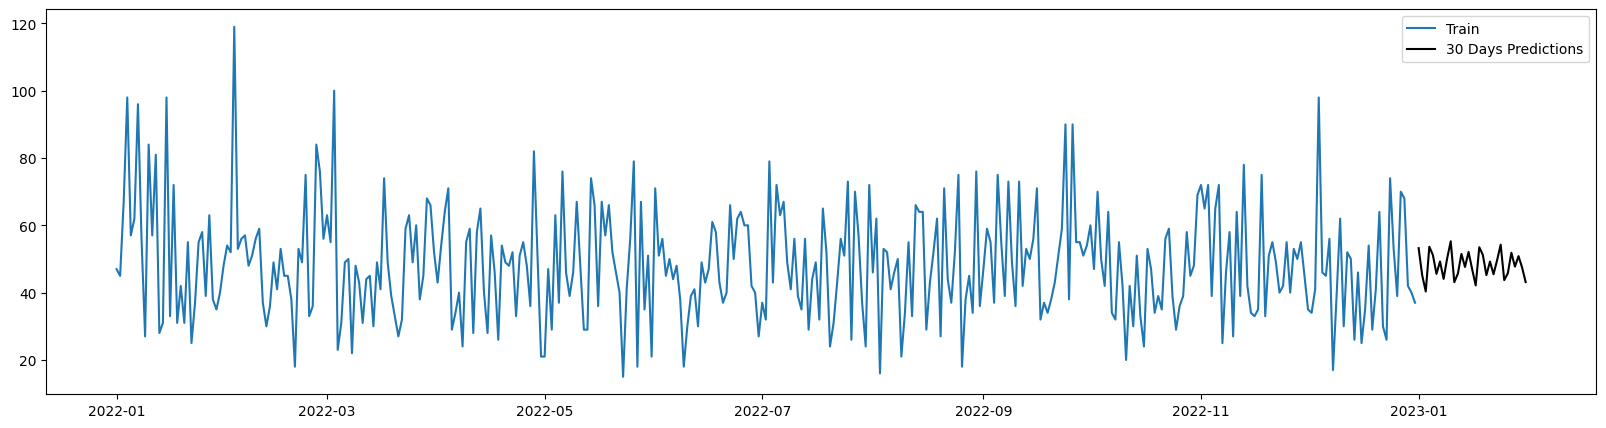

In [114]:
plt.figure(figsize=(20, 5))
plt.plot(y_reg, label='Train')
plt.plot(prediction, color='black', label='30 Days Predictions')
plt.legend()